In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("salaryprediction.csv")
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [51]:
df.shape

(18981, 7)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [53]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [54]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [55]:
df.columns=df.columns.str.strip()
df.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [56]:
for i in df.columns:
    df[i]=df[i].str.strip()

In [57]:
len(df.columns)

7

In [58]:
df['Name']=df['Name'].apply(lambda x : x.lower())
df['JobTitle']=df['JobTitle'].apply(lambda x : x.lower())
df['AgencyID']=df['AgencyID'].apply(lambda x : x.lower())
df['Agency']=df['Agency'].apply(lambda x : x.lower())

In [59]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"aaron,keontae e",aide blue chip,w02200,youth summer,06/10/2013,$11310.00,$873.63
1,"aaron,patricia g",facilities/office services ii,a03031,oed-employment dev,10/24/1979,$53428.00,$52868.38
2,"aaron,petra l",assistant state's attorney,a29005,states attorneys office,09/25/2006,$68300.00,$67439.19
3,"abaineh,yohannes t",epidemiologist,a65026,hlth-health department,07/23/2009,$62000.00,$58654.74
4,"abbene,anthony m",police officer trainee,a99416,police department,07/24/2013,$43999.00,$39686.95


In [60]:
df['year']=pd.to_datetime(df['HireDate']).dt.year
df['month']=pd.to_datetime(df['HireDate']).dt.month
df['day']=pd.to_datetime(df['HireDate']).dt.day

In [61]:
df['AnnualSalary']=df['AnnualSalary'].apply(lambda x : x[1:])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18981 non-null  object 
 1   JobTitle      18981 non-null  object 
 2   AgencyID      18981 non-null  object 
 3   Agency        18981 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18981 non-null  object 
 6   GrossPay      15758 non-null  object 
 7   year          18911 non-null  float64
 8   month         18911 non-null  float64
 9   day           18911 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.4+ MB


In [63]:
df['AnnualSalary']=pd.to_numeric(df['AnnualSalary'])

In [64]:
df=df.drop_duplicates()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18981 non-null  object 
 1   JobTitle      18981 non-null  object 
 2   AgencyID      18981 non-null  object 
 3   Agency        18981 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18981 non-null  float64
 6   GrossPay      15758 non-null  object 
 7   year          18911 non-null  float64
 8   month         18911 non-null  float64
 9   day           18911 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.4+ MB


In [66]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay,year,month,day
0,"aaron,keontae e",aide blue chip,w02200,youth summer,06/10/2013,11310.0,$873.63,2013.0,6.0,10.0
1,"aaron,patricia g",facilities/office services ii,a03031,oed-employment dev,10/24/1979,53428.0,$52868.38,1979.0,10.0,24.0
2,"aaron,petra l",assistant state's attorney,a29005,states attorneys office,09/25/2006,68300.0,$67439.19,2006.0,9.0,25.0
3,"abaineh,yohannes t",epidemiologist,a65026,hlth-health department,07/23/2009,62000.0,$58654.74,2009.0,7.0,23.0
4,"abbene,anthony m",police officer trainee,a99416,police department,07/24/2013,43999.0,$39686.95,2013.0,7.0,24.0


In [67]:
df.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
year              70
month             70
day               70
dtype: int64

In [68]:
df.shape

(18981, 10)

In [69]:
(70/df.shape[0])*100

0.368789842474053

In [70]:
df.dropna(subset='HireDate',inplace=True)

In [71]:
df['HireDate'].isnull().sum()

0

In [72]:
df.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
year               0
month              0
day                0
dtype: int64

In [73]:
df['year']=df['year'].astype('int')
df['month']=df['month'].astype('int')
df['day']=df['day'].astype('int')

In [74]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay,year,month,day
0,"aaron,keontae e",aide blue chip,w02200,youth summer,06/10/2013,11310.0,$873.63,2013,6,10
1,"aaron,patricia g",facilities/office services ii,a03031,oed-employment dev,10/24/1979,53428.0,$52868.38,1979,10,24
2,"aaron,petra l",assistant state's attorney,a29005,states attorneys office,09/25/2006,68300.0,$67439.19,2006,9,25
3,"abaineh,yohannes t",epidemiologist,a65026,hlth-health department,07/23/2009,62000.0,$58654.74,2009,7,23
4,"abbene,anthony m",police officer trainee,a99416,police department,07/24/2013,43999.0,$39686.95,2013,7,24


In [75]:
df.drop(columns=['HireDate','GrossPay'],inplace=True)
df.head()

,Name,JobTitle,AgencyID,Agency,AnnualSalary,year,month,day
0,"aaron,keontae e",aide blue chip,w02200,youth summer,11310.0,2013,6,10
1,"aaron,patricia g",facilities/office services ii,a03031,oed-employment dev,53428.0,1979,10,24
2,"aaron,petra l",assistant state's attorney,a29005,states attorneys office,68300.0,2006,9,25
3,"abaineh,yohannes t",epidemiologist,a65026,hlth-health department,62000.0,2009,7,23
4,"abbene,anthony m",police officer trainee,a99416,police department,43999.0,2013,7,24


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18911 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   AnnualSalary  18911 non-null  float64
 5   year          18911 non-null  int32  
 6   month         18911 non-null  int32  
 7   day           18911 non-null  int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 1.1+ MB


In [77]:
df['Name']

0             aaron,keontae e
1            aaron,patricia g
2               aaron,petra l
3          abaineh,yohannes t
4            abbene,anthony m
                 ...         
18976    zotamou,jean marie d
18977         zotamou,pivot d
18978    zovistoski,zachary d
18979       zubyk,stanislav t
18980      zukowski,charles j
Name: Name, Length: 18911, dtype: object

In [78]:
df['JobTitle'].nunique()

1060

In [79]:
df['JobTitle'].value_counts()

JobTitle
aide blue chip                    4817
police officer                    1866
laborer (hourly)                   597
crossing guard                     374
emt firefighter suppression        358
                                  ... 
supt communications/computer o       1
vehicle damage investigator          1
accounting systems analyst           1
desk top publishing coordinato       1
president city council               1
Name: count, Length: 1060, dtype: int64

1060


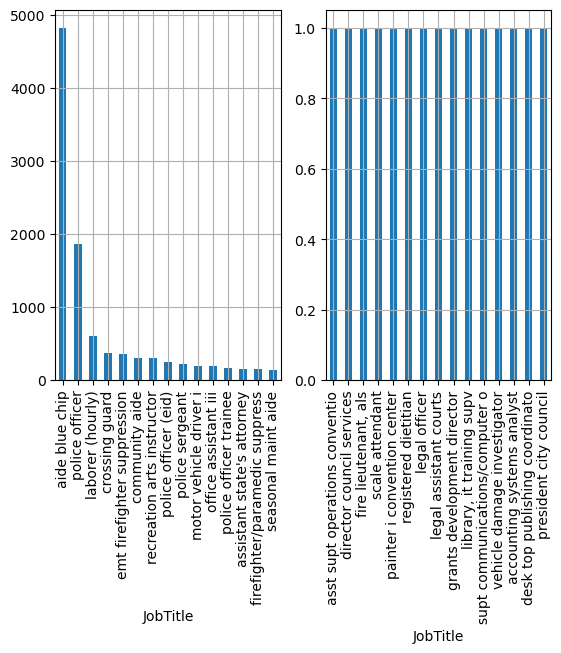

In [80]:
print(df['JobTitle'].nunique())
plt.subplot(1,2,1)
df['JobTitle'].value_counts().head(15).plot(kind='bar')
plt.grid()
plt.subplot(1,2,2)
df['JobTitle'].value_counts().tail(15).plot(kind='bar')
plt.grid()

In [81]:
df['Agency'].nunique()

64

In [82]:
df['Agency'].value_counts()

Agency
youth summer                4817
police department           3141
fire department             1576
dpw-water & waste water     1491
hlth-health department       833
                            ... 
m-r labor commissioner         6
hlth-health dept locatio       6
legislative reference          5
m-r cable & comm               4
special city services          4
Name: count, Length: 64, dtype: int64

64


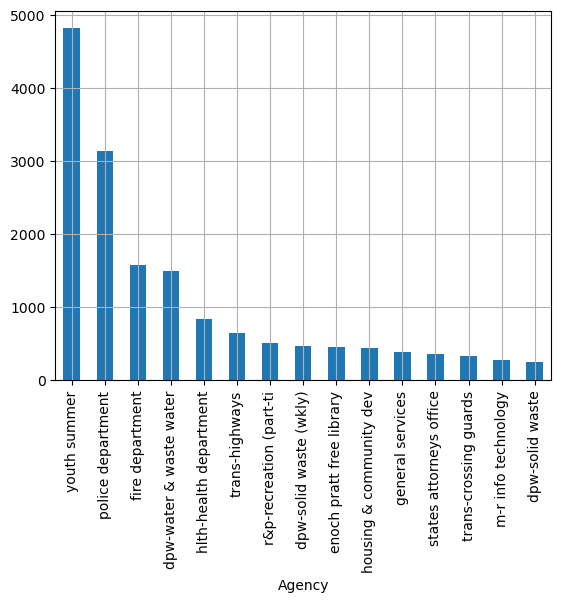

In [83]:
print(df['Agency'].nunique())
df['Agency'].value_counts().head(15).plot.bar()
plt.grid()

1177


<Axes: xlabel='AgencyID'>

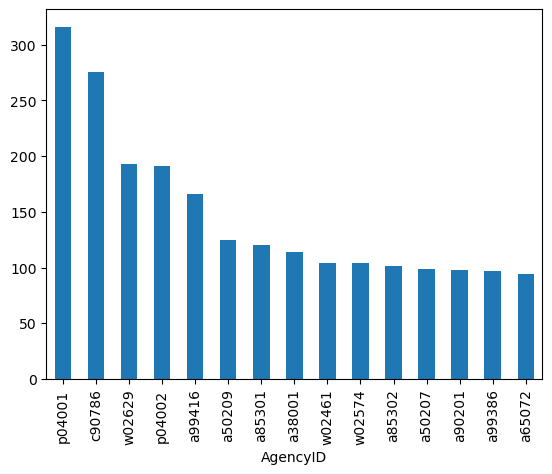

In [84]:
print(df['AgencyID'].nunique())
df['AgencyID'].value_counts().head(15).plot.bar()

In [49]:
import pandas as pd

# Sample DataFrame
data = {
    'column1': [1, 2, 3, 4, 5],
    'column2': [3, 4, 5, 6, 7]
}
df = pd.DataFrame(data)

# Find common rows between column1 and column2
common_rows = pd.merge(df[['column1']], df[['column2']], how='inner', left_on='column1', right_on='column2')

# Display the common rows
print(common_rows)


   column1  column2
0        3        3
1        4        4
2        5        5
   column1  column2
0        3        3
1        4        4
2        5        5


In [50]:
# Find common values between column1 and column2
common_values = set(df['column1']).intersection(set(df['column2']))

# Display the common values
print(common_values)

{3, 4, 5}
{3, 4, 5}


In [51]:
import pandas as pd

# Sample DataFrame
data = {
    'column1': [1, 2, 3, 4, 5],
    'column2': [3, 4, 5, 6, 7]
}
df = pd.DataFrame(data)

# Convert columns to sets
set_col1 = set(df['column1'])
set_col2 = set(df['column2'])

# Find uncommon values
uncommon_values_col1 = set_col1 - set_col2
uncommon_values_col2 = set_col2 - set_col1

# Combine uncommon values
uncommon_values = uncommon_values_col1.union(uncommon_values_col2)

# Display the uncommon values
print("Uncommon values:", uncommon_values)


Uncommon values: {1, 2, 6, 7}
Uncommon values: {1, 2, 6, 7}


In [52]:
 # Filter rows with uncommon values in column1
uncommon_rows_col1 = df[~df['column1'].isin(set_col2)]

# Filter rows with uncommon values in column2
uncommon_rows_col2 = df[~df['column2'].isin(set_col1)]

# Combine the uncommon rows
uncommon_rows = pd.concat([uncommon_rows_col1, uncommon_rows_col2]).drop_duplicates().reset_index(drop=True)

# Display the uncommon rows
print("Uncommon rows:\n", uncommon_rows)

Uncommon rows:
    column1  column2
0        1        3
1        2        4
2        4        6
3        5        7
Uncommon rows:
    column1  column2
0        1        3
1        2        4
2        4        6
3        5        7


In [53]:
data = {
    'column1': [1, 2, 3, 4, 5],
    'column2': [3, 4, 5, 6, 7]
}
df = pd.DataFrame(data)
df

,column1,column2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7


,column1,column2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7


In [54]:
set_col1 = set(df['column1'])
set_col2 = set(df['column2'])

In [55]:
print(set_col1)

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}


In [56]:
print(set_col2)

{3, 4, 5, 6, 7}
{3, 4, 5, 6, 7}


In [57]:
uncommon_values_col1 = set_col1 - set_col2
uncommon_values_col2 = set_col2 - set_col1
print(uncommon_values_col1)
print(uncommon_values_col2)

{1, 2}
{6, 7}
{1, 2}
{6, 7}


In [58]:
uncommon_values = uncommon_values_col1.union(uncommon_values_col2)

# Display the uncommon values
print("Uncommon values:", uncommon_values)

Uncommon values: {1, 2, 6, 7}
Uncommon values: {1, 2, 6, 7}


In [59]:
df.loc[len(df)]=(2,5)
df.loc[len(df)]=(2,4)

In [60]:
df

,column1,column2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,2,5
6,2,4


,column1,column2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,2,5
6,2,4


In [61]:
# Filter rows with uncommon values in column1
uncommon_rows_col1 = df[~df['column1'].isin(set_col2)]

# Filter rows with uncommon values in column2
uncommon_rows_col2 = df[~df['column2'].isin(set_col1)]

print(uncommon_rows_col1)
print(uncommon_rows_col2)
# Combine the uncommon rows
uncommon_rows = pd.concat([uncommon_rows_col1, uncommon_rows_col2]).drop_duplicates().reset_index(drop=True)

# Display the uncommon rows
print("Uncommon rows:\n", uncommon_rows)

   column1  column2
0        1        3
1        2        4
5        2        5
6        2        4
   column1  column2
3        4        6
4        5        7
Uncommon rows:
    column1  column2
0        1        3
1        2        4
2        2        5
3        4        6
4        5        7
   column1  column2
0        1        3
1        2        4
5        2        5
6        2        4
   column1  column2
3        4        6
4        5        7
Uncommon rows:
    column1  column2
0        1        3
1        2        4
2        2        5
3        4        6
4        5        7
